Prachet Prasad Pandav

21102A0020

BE CMPN A


Upgrading Scikit Learn Library

In [46]:
!pip install scikit-learn==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Importing the Dependencies

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [48]:
# loading the house price dataset to a pandas dataFrame
house_price_dataset = pd.read_csv('/content/housing.csv')

In [49]:
# first 5 rows in the dataset
house_price_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
# last 5 rows in the dataset
house_price_dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [51]:
# number of rows & columns
house_price_dataset.shape

(20640, 10)

In [52]:
# getting info about the dataset
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [53]:
# checking null values
house_price_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [54]:
# getting the stats about dataset
house_price_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Handle missing values.

In [55]:
median = house_price_dataset['total_bedrooms'].median()

In [56]:
#replacing the missing value in total_bedrooms
house_price_dataset['total_bedrooms'].fillna(median, inplace=True)

In [57]:
house_price_dataset['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [58]:
# label encoding
house_price_dataset.replace({'ocean_proximity':{'<1H OCEAN':0,'INLAND':1,'NEAR OCEAN':2,'NEAR BAY':3,'ISLAND':4}},inplace=True)

In [59]:
house_price_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


Exploratory Data Analysis

In [60]:
#setting the figure parameters
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 200

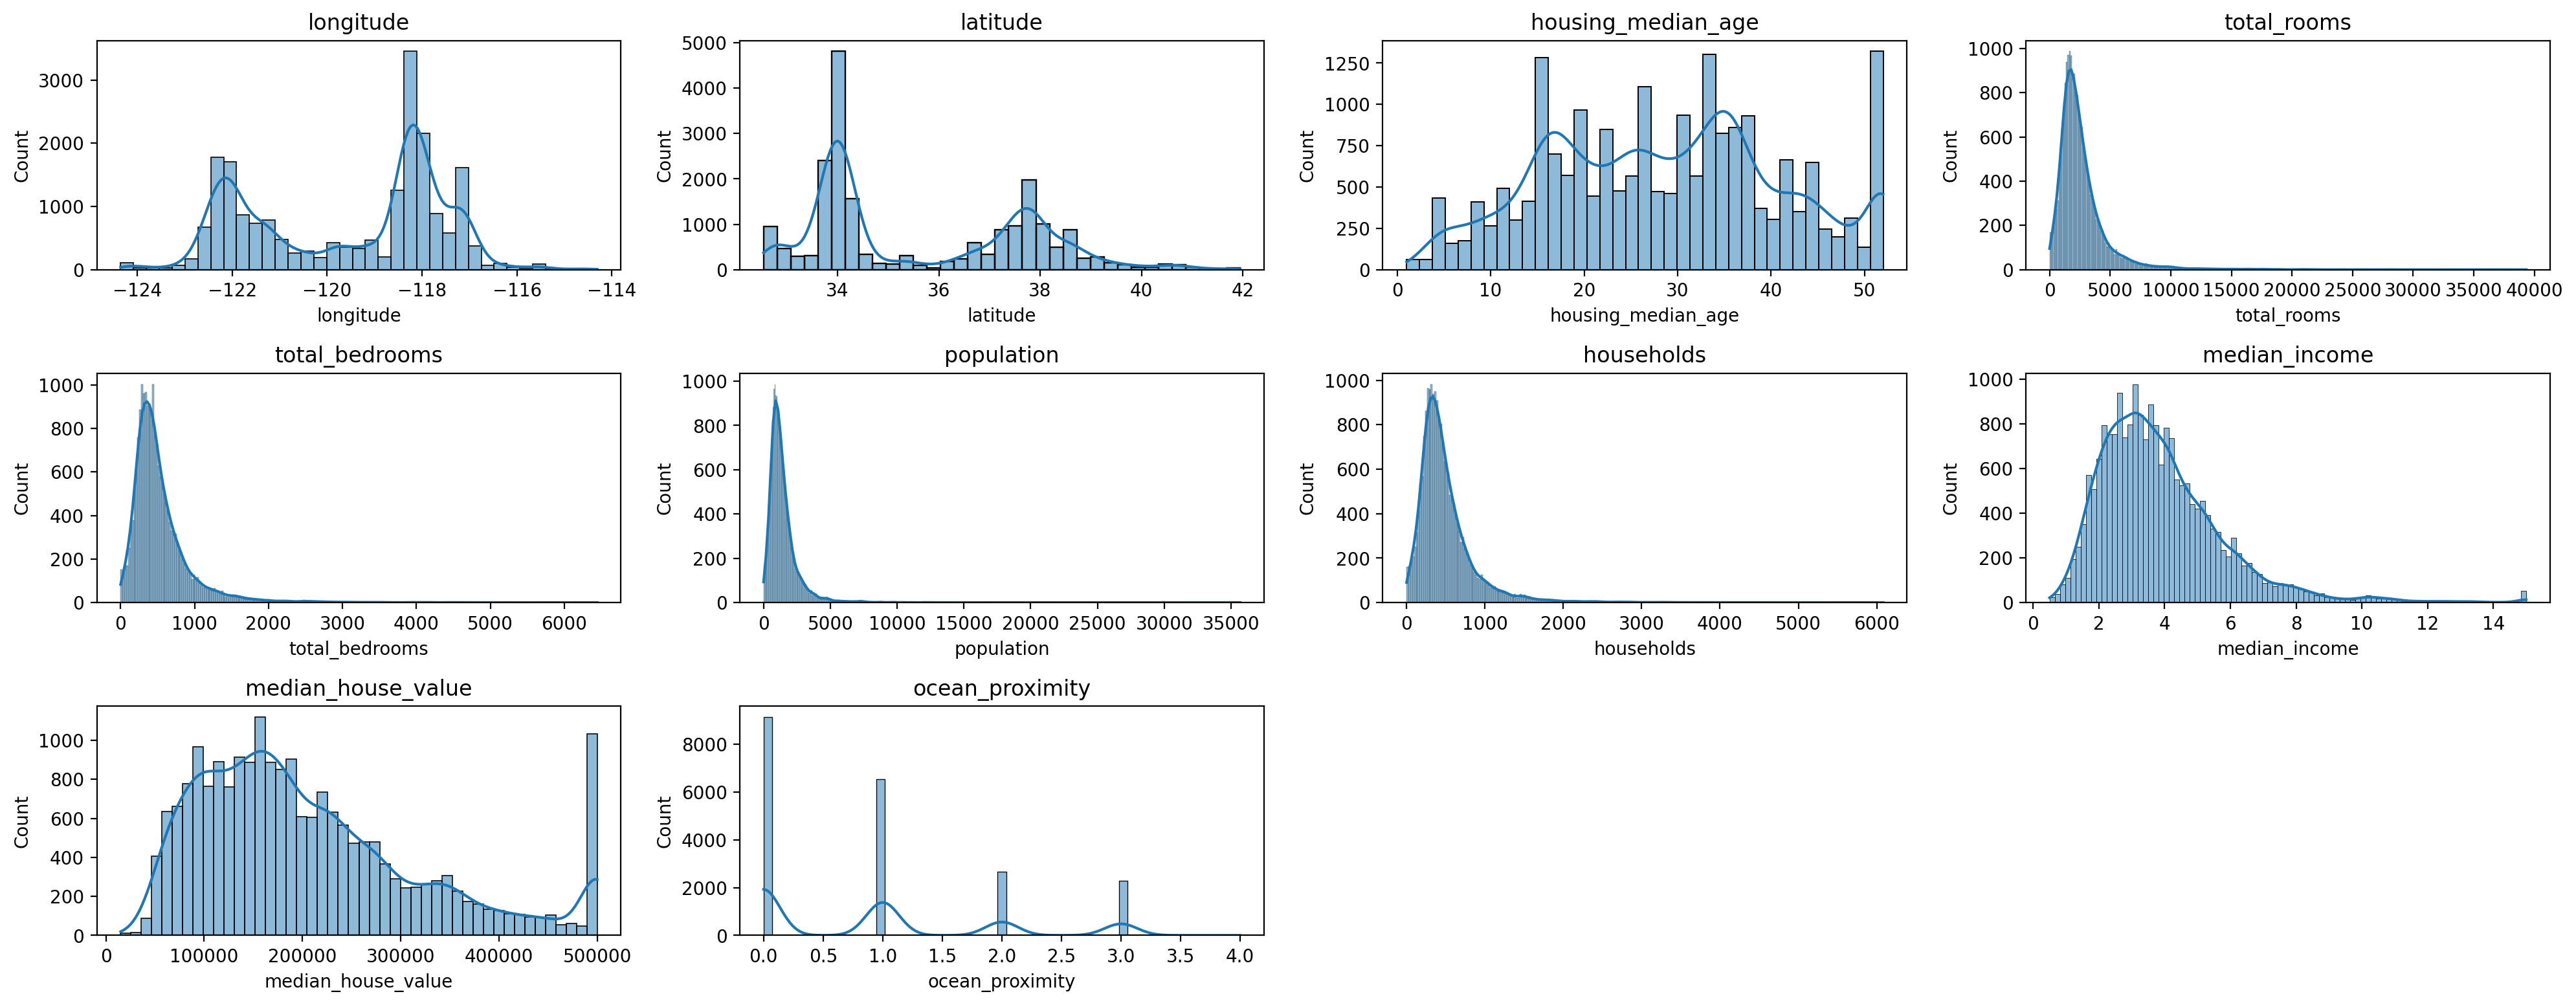

In [61]:
#plotting the histplot for each column in dataset using subplots
columns = house_price_dataset.columns
for i, col in enumerate(columns):
    plt.subplot(4,4, i+1)
    if house_price_dataset[col].dtype == 'object':
      sns.countplot(x=col, data=house_price_dataset,hue=col)
    else:
      sns.histplot(x=col, data=house_price_dataset,kde=True)
    plt.xlabel(col)
    plt.title("{}".format(col))
    plt.tight_layout()

In [62]:
# rechecking the datatype
house_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


<Axes: >

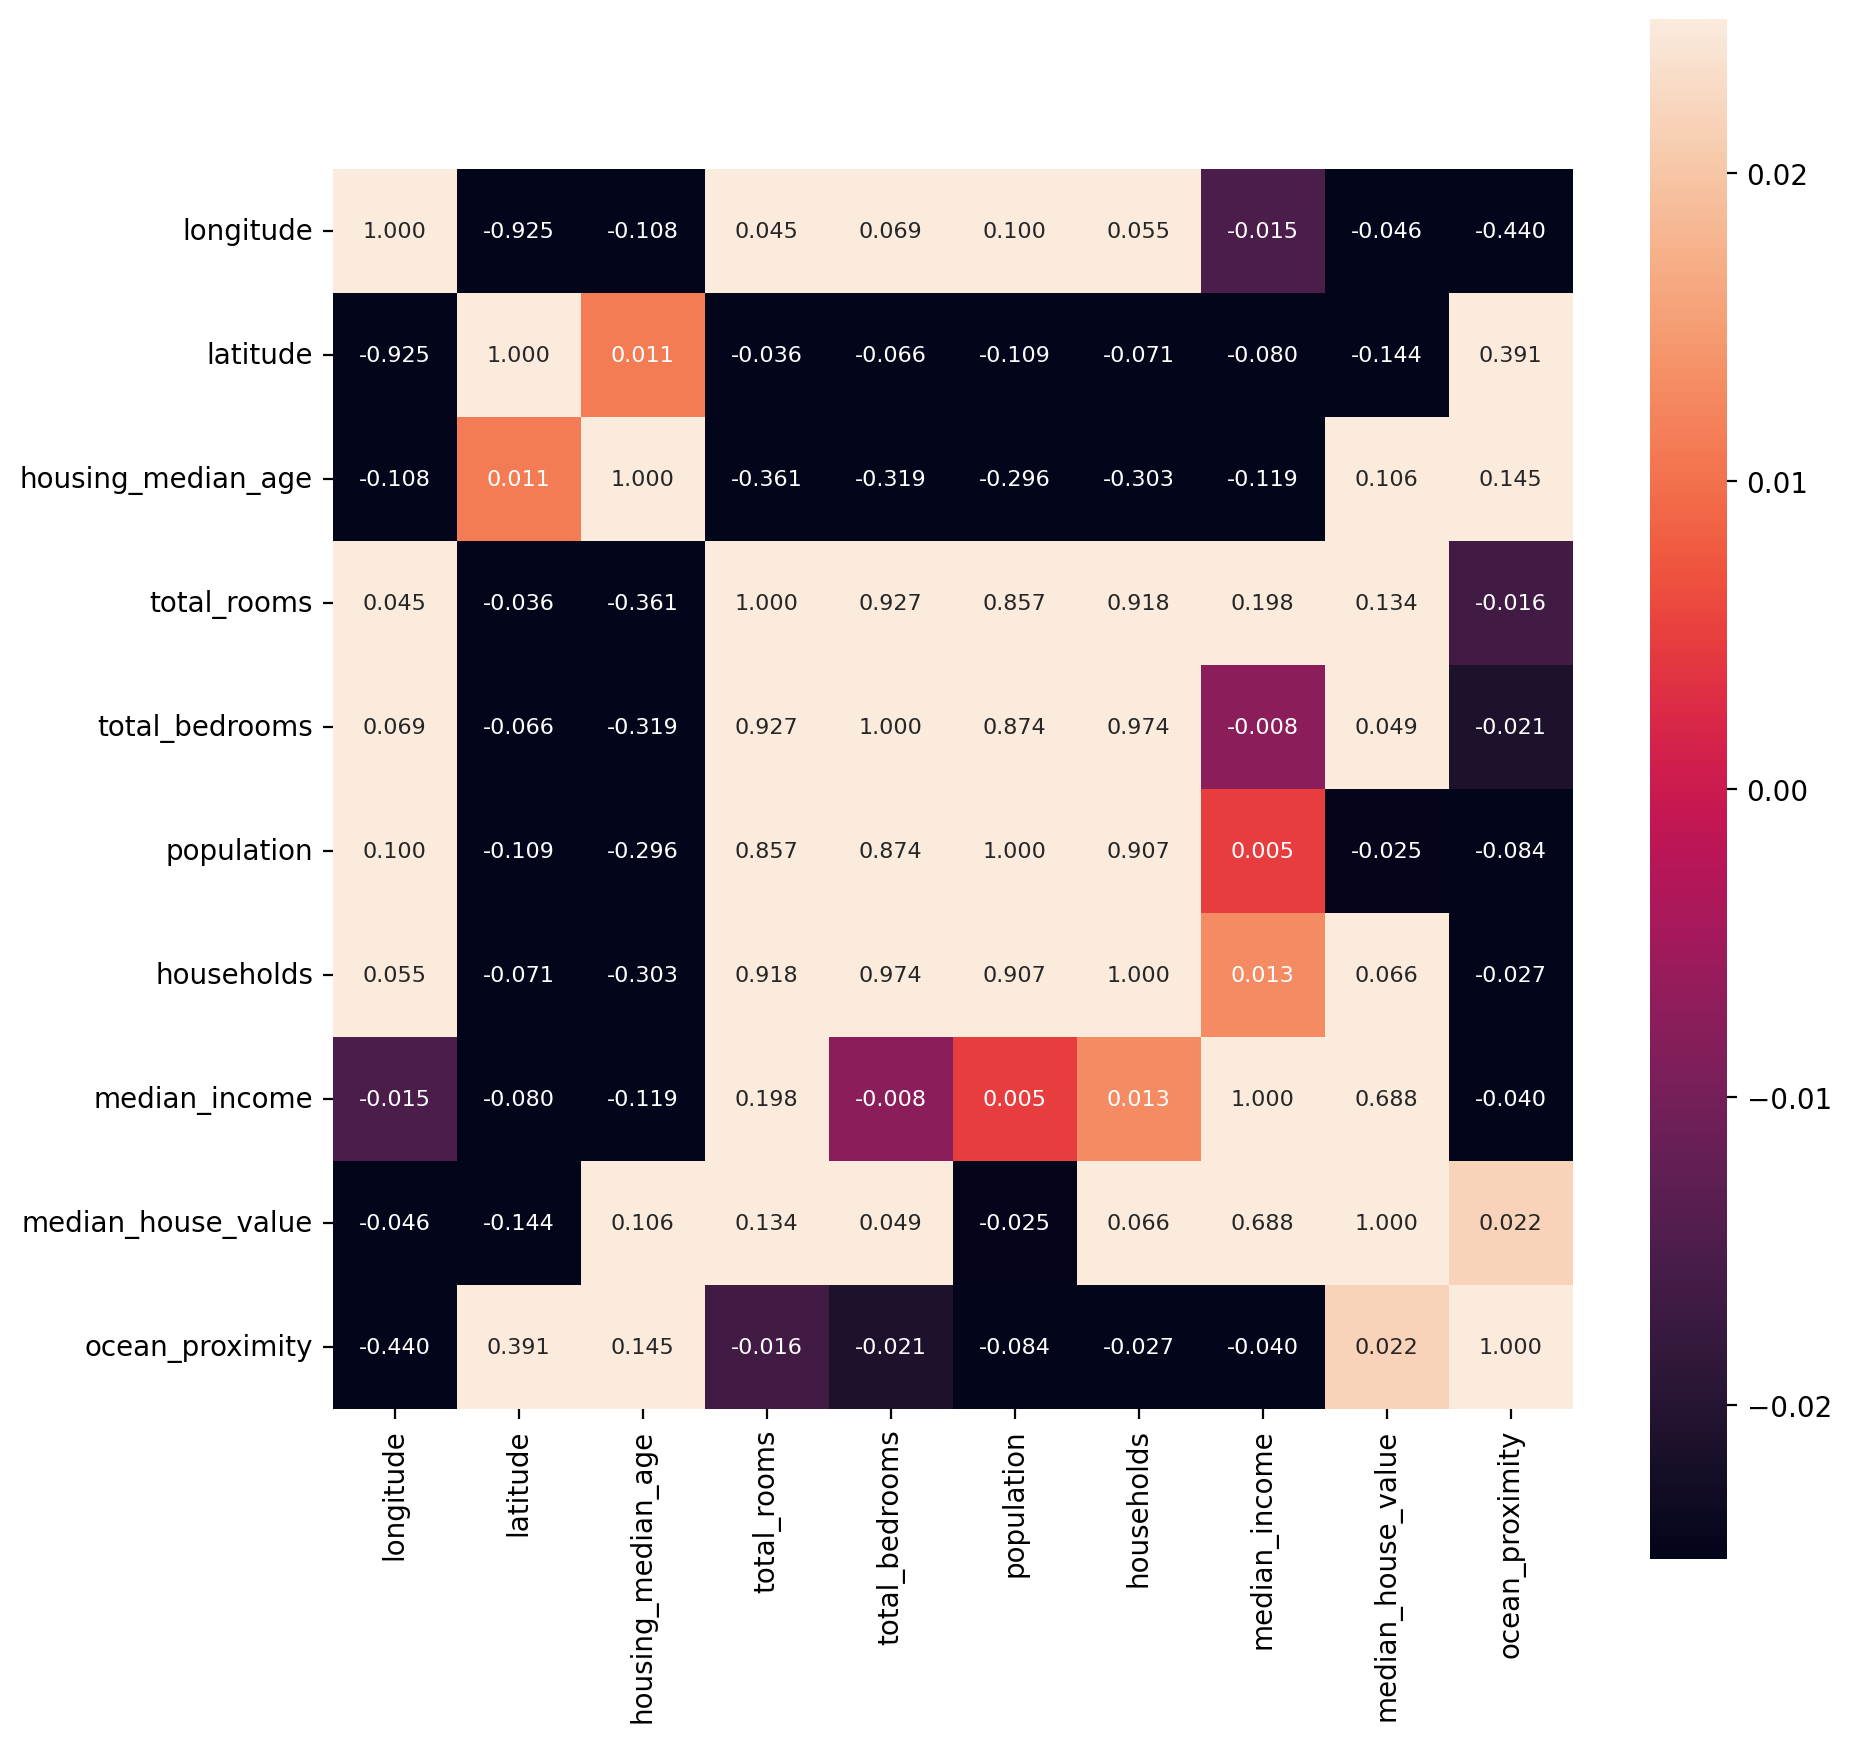

In [63]:
# constructing a heat map to understand correlation
correlation = house_price_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmin=-0.025 , vmax=0.025,cbar=True,square=True,annot=True,fmt='.3f', annot_kws={'size':8})

Splitting the Data

In [64]:
# seperating the data and labels
X = house_price_dataset.drop(columns = 'median_house_value', axis = 1)
y = house_price_dataset['median_house_value']

In [65]:
#importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

In [66]:
# spliting the data in training & testing data
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [67]:
print(X.shape, X_train.shape , X_test.shape)

(20640, 9) (16512, 9) (4128, 9)


In [68]:
# saving the all columns of training data
all_columns = X_train.columns

Standardizing the Data

In [69]:
# importing the Standard Scaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [70]:
#scaling the training data
scaler = StandardScaler()

In [71]:
# scaling the Training Data
X_train[all_columns] = scaler.fit_transform(X_train[all_columns])

In [72]:
# Test Data Preprocessed
# scaling the test data
X_test[all_columns] = scaler.transform(X_test[all_columns])

In [73]:
# first 5 rows after standardization
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,1.085614
8267,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,1.085614
17445,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,1.085614
14265,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,1.085614
2271,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.092338


In [74]:
# statistical description about scaled training data
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,1.753335e-15,6.400995e-17,-9.251859e-18,3.378004e-17,-4.593655e-17,-2.151595e-19,-5.422019e-17,-6.519333e-17,4.292432e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.377207e+00,-1.447697e+00,-2.190766e+00,-1.214029e+00,-1.282826e+00,-1.251913e+00,-1.309827e+00,-1.775438e+00,-9.009387e-01
25%,-1.110749e+00,-8.018107e-01,-8.417859e-01,-5.463144e-01,-5.769692e-01,-5.606339e-01,-5.774595e-01,-6.900689e-01,-9.009387e-01
50%,5.346501e-01,-6.473597e-01,3.108328e-02,-2.359097e-01,-2.422392e-01,-2.281865e-01,-2.362132e-01,-1.758995e-01,9.233764e-02
75%,7.839530e-01,9.720351e-01,6.658972e-01,2.382046e-01,2.589609e-01,2.634487e-01,2.782814e-01,4.686502e-01,9.233764e-02
max,2.628794e+00,2.951816e+00,1.856173e+00,1.686670e+01,1.409685e+01,3.012743e+01,1.465263e+01,5.839268e+00,3.072167e+00


LinearRegression Model

In [75]:
# importing the LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression

In [76]:
# loading the Linear Regression model
lr = LinearRegression()

In [77]:
# importing cross validation score function to calculate the cross validation score
from sklearn.model_selection import cross_val_score

In [78]:
# getting the cross val score of svc with its best features
cv_score_lr = cross_val_score(lr, X_train, y_train, cv=5,scoring='r2')
print(cv_score_lr)
print(cv_score_lr.mean())

[0.64646847 0.64136861 0.65104924 0.63742431 0.61529199]
0.6383205248504698


In [79]:
# fitting the default model with its best features
lr.fit(X_train,y_train)

LinearRegression()

In [80]:
# predicting the labels on test data
y_predict = lr.predict(X_test)

In [83]:
#importing mae,mse,rmse,r2 for evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
# calcuation the mae , mse , r2
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [85]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):",mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 51829.48868420273
Mean Squared Error (MSE): 5066374909.744836
R-squared (R2): 0.6133745270468183


Hyperparameter Tuning : LinearRegression Model

Linear Regression in scikit-learn is relatively straightforward and doesn't have many hyperparameters to tune compared to other more complex models.

Buliding a Predictive System for here

In [87]:
#taking input data 319300.0
input_data = (-122.2,37.84,35.0,2865.0,460.0,1072.0,443.0,7.4882,3)

#loading columns
columns = all_columns

# Convert the tuple to a DataFrame
df = pd.DataFrame([input_data], columns=columns)

#standardizing the data
df[columns] = scaler.transform(df[columns])

#predictions
prediction = lr.predict(df)

print(prediction)


[376288.30440421]
